# Project: Manhattan Coffee Shop
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
    * [Data Visualization](#domestic)
        * [Line Pots](#line)
        * [Horizontal Bar Plot](#bar)
        * [Pie Chart](#pie)
    * [Foursquare API](#four)
    * [Machine Learning](#manhattan)
        * [One Hot Encoding](#one)
        * [K Neighbourhood Cluster](#k)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

Since I live in Manhattan and would like to explore the coffee culture here, the business problem of this project will be **“Where to open a coffee shop in Manhattan?”**.           

This project is going to target **stakeholders** who are interested in investing in a coffee shop in Manhattan.  

A coffee shop promotes the innovation of the understanding of the coffee and provides an atmosphere that comforts customers in the public sector.                          
However, the cost of opening a coffee shop varies based on store locations in Manhattan.                         
We can use the data science tools that are covered in the Coursera/IBM course Data Science to make our choices, such as data visualization, Foursquare API and machine learning.              
Finally, we will discuss the results and present the project to investors. Especially, showing investors the recommendations.

## Data <a name="data"></a>

List of our data source below:
- Coffee data from the US Department of Agriculture
    - Use: analyze the US domestic coffee consumption trend
    - Source:https://apps.fas.usda.gov/psdonline/app/index.html#/app/downloads
- Geoinformation accessed from the Foursquare API
    - Use: access geolocation details of manhattan
    - Source:https://foursquare.com/developers/explore
- Manhattan neighborhood name data from NYU Spatial Data Repository
    - Use: access neighborhoods location details of manhattan
    - Source:https://apps.fas.usda.gov/psdonline/app/index.html#/app/downloads 

## Methodology <a name="methodology"></a>

## Domestic Coffee Consumption between 1959 - 2020 <a name="domestic"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('psd_coffee.csv')

In [3]:
# Analyze Domestic Comsumption Only.
df=df[df.Attribute_Description=='Domestic Consumption'].reset_index(drop=True)

In [4]:
df.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
0,711100,"Coffee, Green",AG,Algeria,2003,2012,6,125,Domestic Consumption,2,(1000 60 KG BAGS),1805.0
1,711100,"Coffee, Green",AG,Algeria,2004,2012,6,125,Domestic Consumption,2,(1000 60 KG BAGS),1970.0
2,711100,"Coffee, Green",AG,Algeria,2005,2012,6,125,Domestic Consumption,2,(1000 60 KG BAGS),1930.0
3,711100,"Coffee, Green",AG,Algeria,2006,2012,6,125,Domestic Consumption,2,(1000 60 KG BAGS),2085.0
4,711100,"Coffee, Green",AG,Algeria,2007,2012,6,125,Domestic Consumption,2,(1000 60 KG BAGS),1840.0


In [5]:
df.count()

Commodity_Code           3911
Commodity_Description    3911
Country_Code             3911
Country_Name             3911
Market_Year              3911
Calendar_Year            3911
Month                    3911
Attribute_ID             3911
Attribute_Description    3911
Unit_ID                  3911
Unit_Description         3911
Value                    3911
dtype: int64

In [6]:
df.columns.values

array(['Commodity_Code', 'Commodity_Description', 'Country_Code',
       'Country_Name', 'Market_Year', 'Calendar_Year', 'Month',
       'Attribute_ID', 'Attribute_Description', 'Unit_ID',
       'Unit_Description', 'Value'], dtype=object)

In [7]:
# clean the data set to remove a few unnessary columns.
ds=df.drop(columns={'Commodity_Code','Commodity_Description','Calendar_Year','Month','Attribute_ID', 'Attribute_Description','Country_Code','Unit_ID','Unit_Description'})
ds

,Country_Name,Market_Year,Value
0,Algeria,2003,1805.0
1,Algeria,2004,1970.0
2,Algeria,2005,1930.0
3,Algeria,2006,2085.0
4,Algeria,2007,1840.0
...,...,...,...
3906,Zimbabwe,2017,0.0
3907,Zimbabwe,2018,0.0
3908,Zimbabwe,2019,0.0
3909,Zimbabwe,2020,0.0


In [8]:
ds=ds.groupby(['Country_Name','Market_Year']).sum()
ds

Value
Country_Name Market_Year        
Algeria      2003         1805.0
             2004         1970.0
             2005         1930.0
             2006         2085.0
             2007         1840.0
...                          ...
Zimbabwe     2017            0.0
             2018            0.0
             2019            0.0
             2020            0.0
             2021            0.0

[3911 rows x 1 columns]

# US Domestic Coffee Consumption Line Pots between 1959 - 2021 <a name="line"></a>

In [9]:
us=ds.loc['United States']
us

,Value
Market_Year,
1960,0.0
1961,287.0
1962,247.0
1963,282.0
1964,246.0
...,...
2017,25512.0
2018,25557.0
2019,27155.0


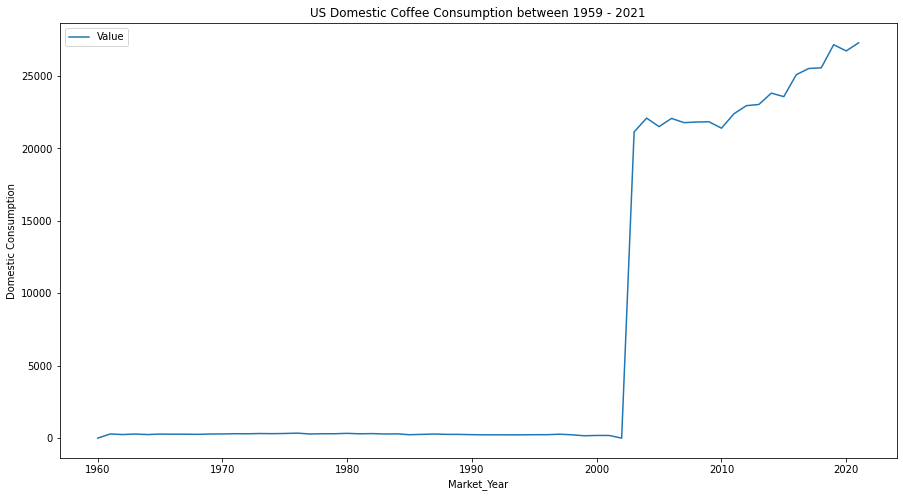

In [13]:
us.plot(kind='line',figsize=(15, 8))
plt.title('US Domestic Coffee Consumption between 1959 - 2021')
plt.ylabel('Domestic Consumption')
plt.xlabel('Market_Year')
plt.show()

# US Domestic Coffee Consumption Line Pots between 2003 - 2020 <a name="line"></a>

In [11]:
us2=us.tail(19)
us2

,Value
Market_Year,
2003,21133.0
2004,22086.0
2005,21500.0
2006,22066.0
2007,21772.0
2008,21816.0
2009,21832.0
2010,21391.0
2011,22383.0


In [14]:
us2.index=us2.index.astype(str)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


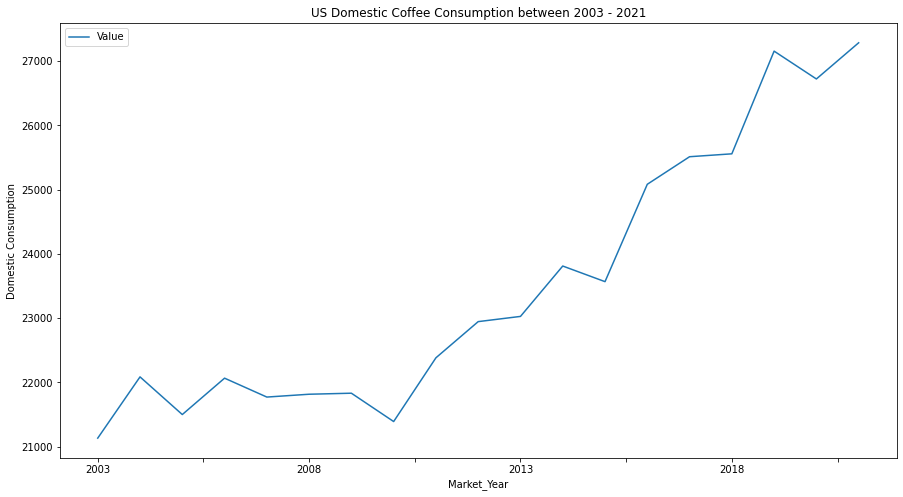

In [15]:
us2.plot(kind='line',figsize=(15, 8))
plt.title('US Domestic Coffee Consumption between 2003 - 2021')
plt.ylabel('Domestic Consumption')
plt.xlabel('Market_Year')
plt.show()

# Coffee 'Deomestic Consumption'

In [42]:
#
#https://apps.fas.usda.gov/psdonline/app/index.html#/app/downloads
coffee=pd.read_csv('Table_04_Coffee.csv')
coffee

,,,,,,,Table 04 Coffee Consumption
,2015/16,2016/17,2017/18,2018/19,2019/20,Jun 2020/21,NaN
Domestic Consumption,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,2320,2205,2300,2340,2040,2240,NaN
Angola,13,14,13,12,5,10,NaN
Argentina,741,754,775,735,825,850,NaN
...,...,...,...,...,...,...,...
Vietnam,2630,2770,2880,2940,3100,3200,NaN
Yemen,122,122,120,120,95,95,NaN
Zambia,0,0,0,0,0,0,NaN
Zimbabwe,0,0,0,0,0,0,NaN


In [43]:
coffee=coffee.drop(['Domestic Consumption'])
coffee=coffee.drop(['Table 04 Coffee Consumption'],axis=1)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [44]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 84 entries, ('                ', '2015/16', '2016/17', '2017/18', '2018/19', '2019/20', 'Jun 2020/21') to ('    Total', '152769', '153872', '159700', '165001', '163941', '166284')
Empty DataFrame

In [45]:
#convert multi_index to columns
coffee=coffee.reset_index()
coffee

,level_0,level_1,level_2,level_3,level_4,level_5,level_6
0,,2015/16,2016/17,2017/18,2018/19,2019/20,Jun 2020/21
1,Algeria,2320,2205,2300,2340,2040,2240
2,Angola,13,14,13,12,5,10
3,Argentina,741,754,775,735,825,850
4,Australia,1785,1730,1900,2040,1945,2065
...,...,...,...,...,...,...,...
79,Vietnam,2630,2770,2880,2940,3100,3200
80,Yemen,122,122,120,120,95,95
81,Zambia,0,0,0,0,0,0
82,Zimbabwe,0,0,0,0,0,0


In [46]:
s=sum([152769,153872,159700,165001,16394,166284])
s

814020

In [47]:
coffee=coffee.rename(columns={'level_0':'country','level_1':'2015/16',
                              'level_2':'2016/17','level_3':'2017/18',
                             'level_4':'2018/19','level_5':'2019/20',
                             'level_6':'Jun 2020/21'})

In [48]:
coffee

,country,2015/16,2016/17,2017/18,2018/19,2019/20,Jun 2020/21
0,,2015/16,2016/17,2017/18,2018/19,2019/20,Jun 2020/21
1,Algeria,2320,2205,2300,2340,2040,2240
2,Angola,13,14,13,12,5,10
3,Argentina,741,754,775,735,825,850
4,Australia,1785,1730,1900,2040,1945,2065
...,...,...,...,...,...,...,...
79,Vietnam,2630,2770,2880,2940,3100,3200
80,Yemen,122,122,120,120,95,95
81,Zambia,0,0,0,0,0,0
82,Zimbabwe,0,0,0,0,0,0


In [49]:
#remove the first row and the last row
coffee=coffee.iloc[1:-1].reset_index(drop=True)

In [50]:
#set the first column to index
coffee.set_index('country',inplace=True)

In [51]:
coffee

,2015/16,2016/17,2017/18,2018/19,2019/20,Jun 2020/21
country,,,,,,
Algeria,2320,2205,2300,2340,2040,2240
Angola,13,14,13,12,5,10
Argentina,741,754,775,735,825,850
Australia,1785,1730,1900,2040,1945,2065
Benin,0,0,0,0,0,0
...,...,...,...,...,...,...
Venezuela,1151,1133,1217,1214,956,816
Vietnam,2630,2770,2880,2940,3100,3200
Yemen,122,122,120,120,95,95


In [52]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82 entries,  Algeria to  Zimbabwe
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   2015/16      82 non-null     object
 1   2016/17      82 non-null     object
 2   2017/18      82 non-null     object
 3   2018/19      82 non-null     object
 4   2019/20      82 non-null     object
 5   Jun 2020/21  82 non-null     object
dtypes: object(6)
memory usage: 4.5+ KB


In [53]:
#check the type of index and columns 
print(type(coffee.columns))
print(type(coffee.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.base.Index'>


In [54]:
#get the index and columns as lists
coffee.columns.tolist()
coffee.index.tolist()
print(type(coffee.columns.tolist()))
print(type(coffee.index.tolist()))

<class 'list'>
<class 'list'>


In [55]:
#check data type
coffee.dtypes

2015/16        object
2016/17        object
2017/18        object
2018/19        object
2019/20        object
Jun 2020/21    object
dtype: object

In [56]:
#convert data type to integer
coffee=coffee.astype(int)

In [57]:
#view the dimension of the dataframe
coffee.shape

(82, 6)

In [58]:
#convert column name into string
coffee.columns=list(map(str,coffee.columns))

In [59]:
#add the total column
coffee['Total'] = coffee.sum(axis=1)

In [60]:
#delete the row with 'Total' value 0
coffee=coffee[coffee.Total != 0]

In [61]:
coffee

,2015/16,2016/17,2017/18,2018/19,2019/20,Jun 2020/21,Total
country,,,,,,,
Algeria,2320,2205,2300,2340,2040,2240,13445
Angola,13,14,13,12,5,10,67
Argentina,741,754,775,735,825,850,4680
Australia,1785,1730,1900,2040,1945,2065,11465
Bolivia,49,54,60,62,63,60,348
...,...,...,...,...,...,...,...
Ukraine,970,960,1105,1145,1225,1275,6680
United States,25083,25512,25557,27155,26722,27285,157314
Venezuela,1151,1133,1217,1214,956,816,6487


In [62]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries,  Algeria to  Yemen
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   2015/16      67 non-null     int64
 1   2016/17      67 non-null     int64
 2   2017/18      67 non-null     int64
 3   2018/19      67 non-null     int64
 4   2019/20      67 non-null     int64
 5   Jun 2020/21  67 non-null     int64
 6   Total        67 non-null     int64
dtypes: int64(7)
memory usage: 4.2+ KB


In [63]:
#set the list of years for map use
years=list(map(str,coffee.columns[1:-1]))
years

['2016/17', '2017/18', '2018/19', '2019/20', 'Jun 2020/21']

# Domestic Coffee Consumption Horizontal Bar Plot <a name="bar"></a>
## Top 10 Countries of Domestic Coffee Consumption between 2016 - 2021

In [65]:
#creat dataframe Top 10 Domestic Consumption Map
coffee.sort_values(by="Total",ascending=True,axis=0,inplace=True)
df_top10=coffee['Total'].tail(10)
df_top10

country
 China              18836
 Ethiopia           19093
 Indonesia          23438
 Canada             28410
 Russia             28470
 Philippines        37905
 Japan              48585
 Brazil            135160
 United States     157314
 European Union    270845
Name: Total, dtype: int64

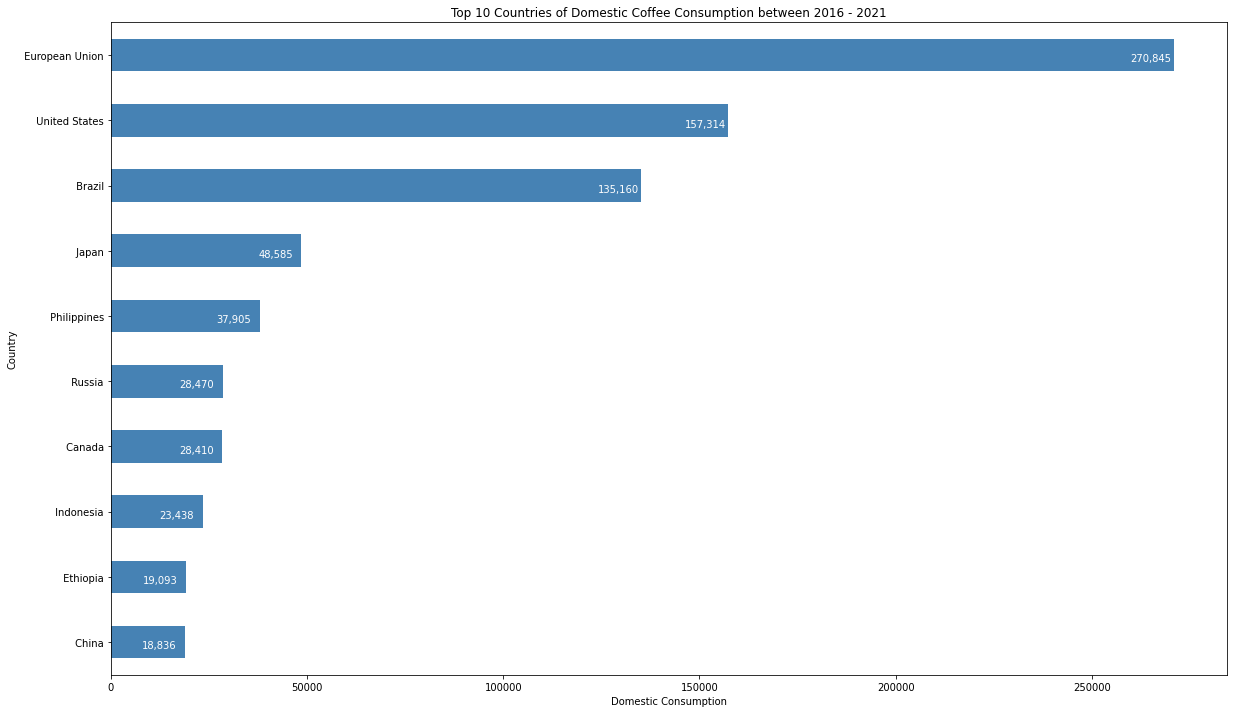

In [66]:
df_top10.plot(kind='barh',figsize=(20, 12),color='steelblue')
plt.title('Top 10 Countries of Domestic Coffee Consumption between 2016 - 2021')
plt.xlabel('Domestic Consumption')
plt.ylabel('Country')
for index, value in enumerate(df_top10): 
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-11000, index-0.10), color='white')
plt.show()

# Domestic Coffee Consumption Pie Chart <a name="pie"></a>

In [67]:
other=coffee.iloc[:-5]
other

,2015/16,2016/17,2017/18,2018/19,2019/20,Jun 2020/21,Total
country,,,,,,,
Malawi,1,1,1,1,1,1,6
Ghana,2,3,3,0,0,0,8
Central African Republic,4,4,3,2,0,0,13
Jamaica,5,5,5,5,5,5,30
Nigeria,19,8,3,0,0,0,30
...,...,...,...,...,...,...,...
China,2833,3218,3085,3100,3250,3350,18836
Ethiopia,3110,3100,3150,3193,3140,3400,19093
Indonesia,3175,3203,3560,4300,4900,4300,23438


In [68]:
s=other.sum(axis=0)
s

2015/16         48066
2016/17         49185
2017/18         51242
2018/19         54349
2019/20         53872
Jun 2020/21     55044
Total          311758
dtype: int64

In [69]:
# add the other row to dataframe
s={'country':['other'],'2015/16':[48066],'2016/17':[49185],'2017/18':[51242],'2018/19':[54349],'2019/20':[53872],'Jun 2020/21':[55044],'Total':[311758]}
df=pd.DataFrame(s)
df_other=df.set_index('country')
df_other

,2015/16,2016/17,2017/18,2018/19,2019/20,Jun 2020/21,Total
country,,,,,,,
other,48066,49185,51242,54349,53872,55044,311758


In [70]:
df_pie=coffee.tail(5).append(df_other)
df_pie

,2015/16,2016/17,2017/18,2018/19,2019/20,Jun 2020/21,Total
country,,,,,,,
Philippines,6210,6995,6550,6125,6000,6025,37905
Japan,8060,8210,8231,8017,7967,8100,48585
Brazil,20855,21625,22420,23200,23530,23530,135160
United States,25083,25512,25557,27155,26722,27285,157314
European Union,44495,42345,45700,46155,45850,46300,270845
other,48066,49185,51242,54349,53872,55044,311758


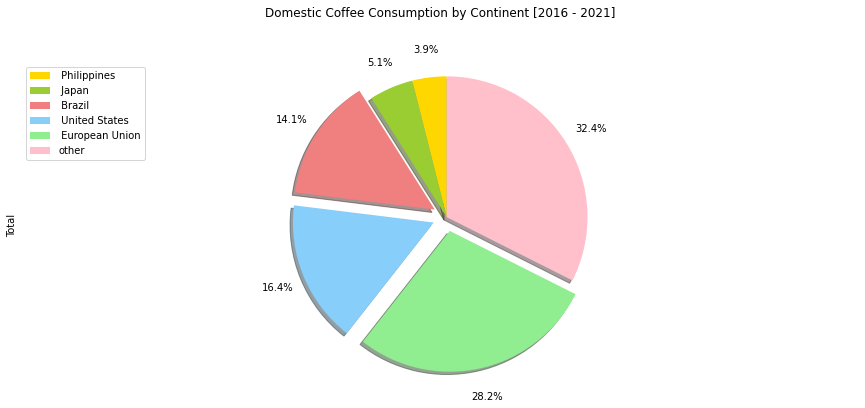

In [71]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0, 0, 0.1, 0.1, 0.1, 0]
df_pie['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,     
                            shadow=True,
                            labels=None,
                            colors=colors_list,
                            pctdistance=1.2,
                            explode=explode_list)
plt.legend(labels=df_pie.index, loc='upper left') 
plt.title('Domestic Coffee Consumption by Continent [2016 - 2021]', y=1.12)
plt.axis('equal')
plt.show()


## Manhattan Coffee Shop <a name="manhattan"></a>

In [156]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim 
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import numpy as np 

In [157]:
with open('nyu_2451_34572-geojson.json') as json_data:
    newyork_data = json.load(json_data)

In [158]:
neighborhoods_data = newyork_data['features']

In [159]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)

In [160]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [161]:
# manhattan Neighborhood 
manhattan=neighborhoods[neighborhoods.Borough =='Manhattan'].reset_index(drop=True)
manhattan

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688
5,Manhattan,Manhattanville,40.816934,-73.957385
6,Manhattan,Central Harlem,40.815976,-73.943211
7,Manhattan,East Harlem,40.792249,-73.944182
8,Manhattan,Upper East Side,40.775639,-73.960508
9,Manhattan,Yorkville,40.775930,-73.947118


In [162]:
print('Manhattan has {} neighborhoods.'.format(manhattan.shape[0]))

Manhattan has 40 neighborhoods.


## Foursquare API<a name="four"></a>

In [163]:
CLIENT_ID = 'QTZFOIG031WDOLB00NR1WNUY3B5XBTV1QABH4SQN0LXXIL1Z' # your Foursquare ID
CLIENT_SECRET = '0LJ2C3BVRA0Z0IQSSOJ5A2UZQLLO5FJGKLOX44KGDR0JAMPA' # your Foursquare Secret
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QTZFOIG031WDOLB00NR1WNUY3B5XBTV1QABH4SQN0LXXIL1Z
CLIENT_SECRET:0LJ2C3BVRA0Z0IQSSOJ5A2UZQLLO5FJGKLOX44KGDR0JAMPA


In [164]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT=100):   
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)     
        results = requests.get(url).json()["response"]['groups'][0]['items']  
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [165]:
venues = getNearbyVenues(names=manhattan['Neighborhood'],latitudes=manhattan['Latitude'],longitudes=manhattan['Longitude'])
print(venues.shape)

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards
(3169, 7)


In [166]:
venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


## One Hot Encoding <a name="one"></a>

In [167]:
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")
onehot['Neighborhood'] = venues['Neighborhood'] 
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
nehot = onehot[fixed_columns]
onehot.head()

,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soba Restaurant,Soccer Field,Social Club,Soup Place,South American Restaurant,South Indian Restaurant,

In [168]:
onehot.shape

(3169, 325)

In [169]:
grouped = onehot.groupby('Neighborhood').mean().reset_index()
grouped.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soba Restaurant,Soccer Field,Social Club,Soup Place,South American Restaurant,South India

In [170]:
grouped.shape

(40, 325)

In [171]:
#write a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [172]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = grouped['Neighborhood']
for ind in np.arange(grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Hotel,Coffee Shop,Gym,Shopping Mall,Memorial Site,Gourmet Shop,Playground,Plaza,Sandwich Place
1,Carnegie Hill,Coffee Shop,Café,Yoga Studio,Bakery,Italian Restaurant,Gym / Fitness Center,Gym,French Restaurant,Pizza Place,Bookstore
2,Central Harlem,Cosmetics Shop,African Restaurant,Chinese Restaurant,French Restaurant,Gym / Fitness Center,Seafood Restaurant,Bar,American Restaurant,Bookstore,Grocery Store
3,Chelsea,Coffee Shop,Art Gallery,American Restaurant,Ice Cream Shop,Italian Restaurant,Hotel,Bakery,Seafood Restaurant,Bookstore,Nightclub
4,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,Dessert Shop,Vietnamese Restaurant,Spa,Optical Shop,American Restaurant,Noodle House,Salon / Barbershop


## K Neighbourhood Cluster <a name="k"></a>
### Manhattan coffee shop neighbourhood cluster

In [173]:
grouped.sort_values(by=['Coffee Shop'], inplace=True,ascending=False)

In [174]:
coffee_shop=grouped[['Neighborhood','Coffee Shop']].reset_index(drop=True)
coffee_shop.head()

,Neighborhood,Coffee Shop
0,Marble Hill,0.130435
1,Financial District,0.110000
2,Manhattanville,0.097561
3,Chelsea,0.090000
4,Civic Center,0.080000


In [175]:
# Cluster Neighborhood based on category 'coffee shop'
kclusters = 5
coffee_shop_clustering =coffee_shop.drop('Neighborhood', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(coffee_shop_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 1, 1, 1, 1, 1, 3, 3, 3], dtype=int32)

In [176]:
coffee_shop.insert(0, 'Cluster Labels', kmeans.labels_)
merged = manhattan
merged = merged.join(coffee_shop.set_index('Neighborhood'), on='Neighborhood')
merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Coffee Shop
0,Manhattan,Marble Hill,40.876551,-73.910660,2,0.130435
1,Manhattan,Chinatown,40.715618,-73.994279,4,0.020000
2,Manhattan,Washington Heights,40.851903,-73.936900,4,0.024096
3,Manhattan,Inwood,40.867684,-73.921210,4,0.016949
4,Manhattan,Hamilton Heights,40.823604,-73.949688,3,0.064516


In [183]:
merged

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Coffee Shop
0,Manhattan,Marble Hill,40.876551,-73.910660,2,0.130435
1,Manhattan,Chinatown,40.715618,-73.994279,4,0.020000
2,Manhattan,Washington Heights,40.851903,-73.936900,4,0.024096
3,Manhattan,Inwood,40.867684,-73.921210,4,0.016949
4,Manhattan,Hamilton Heights,40.823604,-73.949688,3,0.064516
5,Manhattan,Manhattanville,40.816934,-73.957385,1,0.097561
6,Manhattan,Central Harlem,40.815976,-73.943211,4,0.000000
7,Manhattan,East Harlem,40.792249,-73.944182,4,0.000000
8,Manhattan,Upper East Side,40.775639,-73.960508,3,0.057471
9,Manhattan,Yorkville,40.775930,-73.947118,3,0.050000


In [179]:
address = 'Manhattan, NY'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [182]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged['Latitude'], merged['Longitude'], merged['Neighborhood'], merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Results <a name="results"></a>

Results include two parts: US domestic coffee consumption & Manhattan coffee shop

**US domestic coffee consumption**
1. US domestic coffee consumption jumps from the year 2003 based on the line pots. The trend is that domestic consumption is **ascending**. 
2. US domestic coffee consumption between 2016 - 2021 is **ranked 2rd**, based on the horizontal bar plot. The 1st is the European Union. 
3. US domestic coffee consumption by continent between 2016 - 2021 is **16.4%**, **ranked 2rd**.  The 1st is the European Union, which is 28.2%.

**Manhattan coffee shop**
1. The category ‘Coffee shop’ is  **a most common venue** among neighborhoods in manhattan, based on the one hot encoding. 
2. Manhattan neighborhoods are clustered based on the frequency of the coffee shop venue.           
The map of the neighborhoods shows the clusters in different colors and represents the different popularities of the coffee shop.             
The Neighbourhood **'Financial District’** on the map shows the significant populatities compared to other neighborhoods.             
The cluster label 3 shows a large number of neighborhoods cover **shopping areas**, like soho, fifth avenue, time square, etc,.            

## Discussion <a name="discussion"></a>

US is the second largest country that consumes 157,314 ‘Thousand 60-Kilogram Bags’ green coffee since 2016.                                
Also, Manhattan is so called ‘the city that never sleeps’. This project of opening a coffee shop is with high possibility.                           
**Recommendations**
The location of the coffee shop can be the financial district or shopping areas in manhattan.
- Financial District
    - Wall Street must be the best location for a brand opening coffee shop with espressos. 
- Shopping Area
    - Soho is better than fifth avenue because the luxury shops on fifth avenue usually provide cocktails and coffee to customers.           
    It’s much convenient for customers to step for a cup of coffee among the shops in Soho.              


## Conclusion <a name="conclusion"></a>

The top 10 most common venues data frame shows that Manhattan is a great place for living and tourism.    
Coffee shops in Manhattan provide people here a relaxing atmosphere and an optional working place with modern/old fashion design.    
In conclusion, the project of Manhattan Coffee Shop is designed for the Coursera/IBM course ‘Applied Data Science Capstone’.    
This project helps me not only understand the machine learning algorithms, but also apply them in a real-life project.    